# Các thư viện

Nếu bạn đang sử dụng môi trường: __min_ds-env__, hãy install thêm 2 thư viện để trực quan:
- `pip install geopandas`
- `pip install plotly-express`

In [1]:
import geopandas as gpd
import plotly.express as px
import matplotlib.pyplot as plt

import pandas as pd

# Đọc dữ liệu

In [2]:
weather_df = pd.read_csv('data/cleaned/daily_weather_data.csv', encoding='utf-8')
weather_df.head(5)

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


# Hiểu dữ liệu

### Phân bố vị trí địa lý của các quốc gia (không gồm tần suất xuất hiện)

- Ta chỉ cần tên các _quốc gia_ thay vì để tất cả dữ liệu vào.
- Để xem tên _quốc gia_: đưa trỏ chuột lại gần.
- Những _quốc gia_ xuất hiện là màu xanh.

In [3]:
countries = weather_df['country'].unique()

country_visual = px.choropleth(countries, 
                                locationmode='country names',
                                locations=countries)

In [4]:
country_visual.show()

### Phân bố vị trí địa lý của các thành phố (không gồm tần suất xuất hiện)

Lấy danh sách gồm tên _thành phố_, _kinh độ_ và _vĩ độ_ và lưu vào __cities_df__:

In [5]:
# i didn't use drop_duplicates(inplace=True) to avoid warning
cities_df = weather_df[['city', 'Latitude', 'Longitude']].drop_duplicates()
cities_df.shape

(193, 3)

- Lúc này số dòng giảm còn 193, thay vì 324647 dòng bị lặp lại như lúc trước.
- Cải thiện thời gian chạy từ khoảng 30 giây còn 1 giây khi trực quan.

Gom các kinh độ, vĩ độ thành một cặp để trở thành các tọa độ trên bản đồ:
- __points_from_xy__: Tạo ra bản đồ dạng 2 chiều
- Kết quả sau khi gom: __POINT (Longitude, Latitude)__

In [6]:
cities_geo = gpd.GeoDataFrame(cities_df, 
            geometry=gpd.points_from_xy(cities_df.Longitude, cities_df.Latitude))
cities_geo

,city,Latitude,Longitude,geometry
0,Sukhumi,43.001525,41.023415,POINT (41.02341 43.00153)
1532,Mariehamn,60.100000,19.933333,POINT (19.93333 60.10000)
3271,Tirana,41.327546,19.818698,POINT (19.81870 41.32755)
5016,Algiers,36.752887,3.042048,POINT (3.04205 36.75289)
6761,Pago Pago,-14.275632,-170.702036,POINT (-170.70204 -14.27563)
...,...,...,...,...
308844,Vatican City,41.902179,12.453601,POINT (12.45360 41.90218)
310589,Caracas,10.480594,-66.903606,POINT (-66.90361 10.48059)
312325,Hanoi,21.027764,105.834160,POINT (105.83416 21.02776)
314070,Mata-Utu,-13.282509,-176.176447,POINT (-176.17645 -13.28251)


Lấy nền bản đồ (dataset) có sẵn từ geopandas (lowres: low resolution):

In [7]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

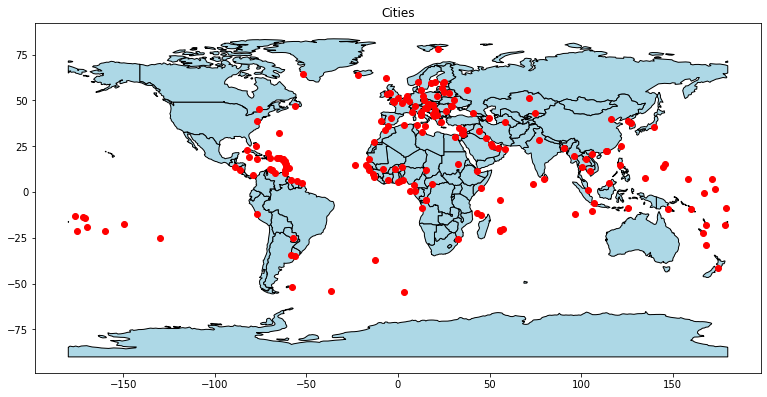

In [8]:
axis = world_data.plot(color='lightblue', edgecolor='black')

cities_geo.plot(ax = axis, color='red') #points on map
plt.title("Cities")

#change the size (make it bigger)
fig = plt.gcf()
fig.set_size_inches(13, 9)
fig.savefig('cities.png', dpi = 200) # save as a picture file
plt.show()

Nhận xét: Dữ liệu thu thập được phân bố chủ yếu ở _Châu Âu_, _Trung Mĩ_, _Tây Phi_, _rải rác ở Đông Nam Á_